In [3]:
import ROOT as r
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.24/00


In [4]:
#Lets look at some pi -> mu decays and compare their characteristics to the pi -> e decays.
f = r.TFile("pienux_out_stripped_muons.root")
f.ls()

TFile**		pienux_out_stripped_muons.root	
 TFile*		pienux_out_stripped_muons.root	
  KEY: TTree	init;2	Initial conditions of the simulation [current cycle]
  KEY: TTree	init;1	Initial conditions of the simulation [backup cycle]
  KEY: TTree	atar;6	Energy deposited in the ATAR [current cycle]
  KEY: TTree	atar;5	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	atar;4	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	calorimeter;2	Energy deposited in the calorimeter [current cycle]
  KEY: TTree	calorimeter;1	Energy deposited in the calorimeter [backup cycle]
  KEY: TTree	degrader;2	Degrader [current cycle]
  KEY: TTree	degrader;1	Degrader [backup cycle]
  KEY: TTree	pipe;2	Events in the beampipe [current cycle]
  KEY: TTree	pipe;1	Events in the beampipe [backup cycle]


In [5]:
t = f.Get("atar")
print([x.GetName() for x in t.GetListOfBranches()])

['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time', 'nhit', 'has_pion', 'pion_decay', 'pion_dar', 'has_muon', 'muon_decay', 'muon_dar', 'has_positron', 'pion_total_edep', 'muon_total_edep', 'pos_total_edep', 'has_excited_nucleus', 'external_total_edep']


In [6]:
for i, e in enumerate(t):
    #Print list of entries with no pion decay or pion decay in flight.
    if e.pion_decay == 1 and e.pion_dar == 0:
        print(i)
        
    if i == 5000:
        break

781
1748
2665


In [35]:
pixel_hits_motion = None

for i, e in enumerate(t):
    # print(i, e.pixel_hits)
    # print(i, e.pixel_pdg)
    # print(i, e.pixel_time)
    
    #Store pixel hits for one of the entries printed above in which a pion didn't decay at rest.
    if i == 781:
        pixel_times_motion = e.pixel_time
        pixel_hits_motion = e.pixel_hits
        pixel_pdg_motion = e.pixel_pdg
        break

print(pixel_times_motion)
print(pixel_hits_motion)
print(pixel_pdg_motion)

{ 2.2180406, 2.2191680, 2.2203121, 2.2214691, 2.2226385, 2.2238195, 2.2250124, 2.2262223, 2.2274542, 2.2276055, 2.2288391, 2.2297507, 2.2303408, 2.2319262, 2.2326459, 2.2335621, 2.2352393, 2.2357363, 2.2369963, 2.2388119, 2.2388812, 2.2406333, 2.2421566, 2.2424996, 2.2444492, 2.2464068, 2.2486490, 2.2511379, 2.2528692, 2.2549853, 2.2585487, 312.82465, 312.82485, 312.82514, 312.82618, 312.82644, 312.82771, 312.82833, 312.82861, 312.82959, 312.82981, 312.83108, 312.83173, 312.83211, 312.83307, 312.83360, 312.83438, 312.83515, 312.83565, 312.83652, 312.83661, 312.83783, 312.83843, 312.83880, 312.83916, 312.84004, 312.84094, 312.84099, 312.84158, 312.84259, 312.84373, 312.84418, 312.84488, 312.84545 }
{ 100014, 100180, 100214, 100380, 100414, 100580, 100614, 100780, 100814, 100980, 100980, 101014, 101015, 101179, 101215, 101216, 101379, 101416, 101417, 101578, 101617, 101618, 101778, 101777, 101819, 101977, 102020, 102177, 102221, 102222, 102223, 102223, 102176, 102177, 102178, 102025, 102

In [36]:
#Extract the time vs. x and time vs. y data from the pixel_hits. The ATAR is made up of sheets that contain alternating horizontal or vertical strips with npixels_per_plane.
#If npixels_per_plane were 100, for instance, 100036 would represent plate 1, 36 / 100 in x, 100161 would represent plate 2, 61 / 100 in y, etc. The output for each of 
#x and y is an n x 2 matrix, where the first column contains the times corresponding to the coordinate values in the second column.
#Also extract the z (plane #) vs. time data. The third element of the tuples contained in this list and the x and y lists will contain red / blue / green colors to represent
#when particles have decayed.
def get_event_data():
    npixels_per_plane = 100
    txc_data = []
    tyc_data = []
    tzc_data = []

    for i in range(pixel_hits_motion.size()):
        plane = int(np.floor((pixel_hits_motion[i] - 1 - 100_000) / npixels_per_plane))

        cur_val = (pixel_hits_motion[i] - 1) % npixels_per_plane
        cur_time = pixel_times_motion[i]
        
        if pixel_pdg_motion[i] == 211:
            cur_color = "r"     # +Pion
        elif pixel_pdg_motion[i] == -11:
            cur_color = "b"     # Positron
        elif pixel_pdg_motion[i] == 11:
            cur_color = "g"     # Electron
        elif pixel_pdg_motion[i] == -13:
            cur_color = "y"     # +Muon
        elif pixel_pdg_motion[i] == 13:
            cur_color = "p"     # -Muon


        tzc_data.append((cur_time, plane, cur_color))

        if(plane % 2 == 0):
            txc_data.append((cur_time, cur_val, cur_color))
        else:
            tyc_data.append((cur_time, cur_val, cur_color))
    
    return (txc_data, tyc_data, tzc_data)

In [37]:
txc_data, tyc_data, tzc_data = get_event_data()
print(pixel_hits_motion.size())
print(len(txc_data))
print(len(tyc_data))

print(txc_data)

64
32
32
[(2.2180406464733355, 13, 'r'), (2.220312091676631, 13, 'r'), (2.2226385370205066, 13, 'r'), (2.2250123977636496, 13, 'r'), (2.2274542332054006, 13, 'r'), (2.2297507200996294, 13, 'y'), (2.230340780270639, 14, 'y'), (2.232645914378166, 14, 'y'), (2.233562064706862, 15, 'y'), (2.235736291593601, 15, 'y'), (2.236996288145119, 16, 'y'), (2.2388812130246047, 16, 'y'), (2.24063329660363, 17, 'y'), (2.2444491557185633, 18, 'y'), (2.248649006056382, 19, 'y'), (2.252869188454851, 20, 'y'), (2.254985289564746, 21, 'y'), (2.258548703979449, 22, 'y'), (312.8246506861661, 22, 'b'), (312.82644271341655, 24, 'b'), (312.8277125838962, 25, 'b'), (312.82981251349975, 27, 'b'), (312.8310846806117, 28, 'b'), (312.83359547575236, 30, 'b'), (312.8343836280823, 31, 'b'), (312.8366101216915, 33, 'b'), (312.8378263355075, 34, 'b'), (312.83842636427505, 35, 'b'), (312.8409930461533, 37, 'b'), (312.84157733319756, 38, 'b'), (312.84259247378554, 39, 'b'), (312.84373117220525, 40, 'b')]


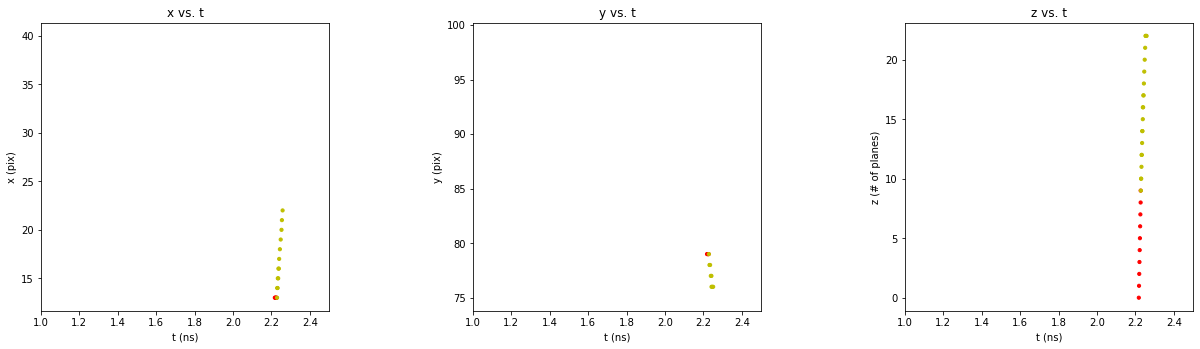

In [40]:
plt.figure(figsize = (20, 5))

#Print out graphs. Red = pion, blue = electron. I don't know what the 22 represents, so that is not accounted for.
plt.subplot(1,3,1)
plt.scatter([i[0] for i in txc_data], [i[1] for i in txc_data], 10, [i[2] for i in txc_data])
plt.title("x vs. t")
plt.xlabel("t (ns)")
plt.ylabel("x (pix)")
# plt.xlim(1, 2.5)

plt.subplot(1,3,2)
plt.scatter([i[0] for i in tyc_data], [i[1] for i in tyc_data], 10, [i[2] for i in tyc_data])
plt.title("y vs. t")
plt.xlabel("t (ns)")
plt.ylabel("y (pix)")
# plt.xlim(1, 2.5)

plt.subplot(1,3,3)
plt.scatter([i[0] for i in tzc_data], [i[1] for i in tzc_data], 10, [i[2] for i in tzc_data])
plt.title("z vs. t")
plt.xlabel("t (ns)")
plt.ylabel("z (# of planes)")
# plt.xlim(1, 2.5)

plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.5, 
                    hspace = 0.4)